In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [187]:
df_train_features = pd.read_csv('dataset/train_features.csv')
df_train_labels = pd.read_csv('dataset/train_labels.csv')
df_test_features = pd.read_csv('dataset/test_features.csv')
df_format = pd.read_csv('dataset/submission_format.csv')

# EDA

In [188]:
df_train_features

,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
1,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
2,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN
3,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN
4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,1955,Magister,Menikah,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,NaN
3813,1947,Doktor,Rencana Menikah,109306000.0,0.0,1.0,44.0,0.0,50575.0,NaN,0.0,3.0,6.0,3.0,0.0,2014-06-09
3814,1974,Magister,Menikah,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,2013-11-07
3815,1957,SMA,Rencana Menikah,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,NaN,4.0,5.0,4.0,0.0,2013-06-30


In [189]:
df_train_labels

,jumlah_promosi
0,2
1,0
2,1
3,4
4,4
...,...
3812,5
3813,1
3814,0
3815,0


In [190]:
df_test_features

,ID,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,2241,1957,Sarjana,NaN,120660151.0,0.0,1.0,63.0,122277.0,541399.0,214192.0,84305.0,4.0,6.0,10.0,0.0,NaN
1,2274,1968,Doktor,Menikah,163551821.0,0.0,1.0,58.0,35761.0,353335.0,63365.0,41112.0,2.0,5.0,10.0,0.0,NaN
2,1107,1968,SMA,Menikah,29857000.0,0.0,0.0,34.0,8092.0,22253.0,30345.0,26299.0,2.0,0.0,5.0,0.0,2013-08-06
3,4478,1971,Doktor,Menikah,117949098.0,0.0,1.0,82.0,4872.0,126061.0,0.0,9745.0,3.0,5.0,7.0,0.0,NaN
4,5080,1974,Sarjana,Rencana Menikah,164761134.0,0.0,0.0,28.0,343208.0,1416462.0,236196.0,107776.0,0.0,1.0,8.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,271,1984,Magister,Sendiri,66320000.0,1.0,0.0,19.0,12138.0,38437.0,0.0,10115.0,4.0,0.0,6.0,1.0,2014-03-17
3814,3334,1972,Sarjana,Menikah,159651946.0,0.0,0.0,90.0,32119.0,1032587.0,176078.0,78693.0,0.0,6.0,8.0,0.0,NaN
3815,3478,1968,Magister,Rencana Menikah,84058923.0,0.0,1.0,46.0,8198.0,47595.0,11392.0,10540.0,NaN,0.0,1.0,0.0,NaN
3816,89,1966,Sarjana,Rencana Menikah,106301000.0,0.0,1.0,74.0,16184.0,78897.0,NaN,0.0,3.0,5.0,3.0,0.0,2014-01-20


## Checking Null Value

In [191]:
df_train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tahun_kelahiran          3817 non-null   int64  
 1   pendidikan               3628 non-null   object 
 2   status_pernikahan        3605 non-null   object 
 3   pendapatan               3627 non-null   float64
 4   jumlah_anak_balita       3627 non-null   float64
 5   jumlah_anak_remaja       3613 non-null   float64
 6   terakhir_belanja         3645 non-null   float64
 7   belanja_buah             3636 non-null   float64
 8   belanja_daging           3639 non-null   float64
 9   belanja_ikan             3624 non-null   float64
 10  belanja_kue              3603 non-null   float64
 11  pembelian_diskon         3639 non-null   float64
 12  pembelian_web            3652 non-null   float64
 13  pembelian_toko           3648 non-null   float64
 14  keluhan                 

In [192]:
df_train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3817 entries, 0 to 3816
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   jumlah_promosi  3817 non-null   int64
dtypes: int64(1)
memory usage: 29.9 KB


## Checking Duplicate

In [193]:
df_train_features.duplicated().value_counts()
# no duplicate values

False    3817
dtype: int64

## Merging Features & Labels (?)

In [194]:
merged_df = pd.merge(df_train_labels, df_train_features, left_index=True, right_index=True)
merged_df

,jumlah_promosi,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,2,1979,Sarjana,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
1,0,1950,Sarjana,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
2,1,1966,Sarjana,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN
3,4,1961,Magister,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN
4,4,1970,Sarjana,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,5,1955,Magister,Menikah,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,NaN
3813,1,1947,Doktor,Rencana Menikah,109306000.0,0.0,1.0,44.0,0.0,50575.0,NaN,0.0,3.0,6.0,3.0,0.0,2014-06-09
3814,0,1974,Magister,Menikah,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,2013-11-07
3815,0,1957,SMA,Rencana Menikah,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,NaN,4.0,5.0,4.0,0.0,2013-06-30


## Explore Pendidikan

In [195]:
merged_df['pendidikan'].unique()

array(['Sarjana', 'Magister', 'SMA', 'SMP', 'Doktor', nan, '5'],
      dtype=object)

In [196]:
merged_df[merged_df['pendidikan'].isnull()]

,jumlah_promosi,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
108,2,1982,NaN,Menikah,34735069.0,1.0,0.0,66.0,19423.0,16366.0,30862.0,21553.0,3.0,3.0,1.0,0.0,NaN
120,5,1963,NaN,Sendiri,77222296.0,1.0,0.0,44.0,17793.0,159679.0,46889.0,31245.0,4.0,3.0,5.0,0.0,NaN
210,0,1973,NaN,Menikah,80923000.0,1.0,1.0,96.0,6069.0,24276.0,0.0,NaN,2.0,4.0,5.0,0.0,2014-05-26
253,0,1947,NaN,Sendiri,109106168.0,1.0,1.0,0.0,5151.0,48781.0,20668.0,3128.0,5.0,NaN,4.0,0.0,NaN
258,6,1963,NaN,Rencana Menikah,119591357.0,0.0,1.0,25.0,16646.0,296940.0,23610.0,39476.0,3.0,5.0,9.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3716,1,1974,NaN,Cerai,25169000.0,1.0,0.0,85.0,6069.0,28322.0,14161.0,32368.0,6.0,5.0,4.0,0.0,2014-01-17
3723,6,1973,NaN,Rencana Menikah,50022737.0,1.0,0.0,68.0,9162.0,8907.0,9383.0,12614.0,0.0,3.0,2.0,0.0,NaN
3738,0,1977,NaN,Sendiri,64076000.0,1.0,0.0,5.0,8092.0,8092.0,28322.0,22253.0,0.0,0.0,5.0,0.0,2014-02-28
3797,4,1982,NaN,Sendiri,120689156.0,0.0,0.0,74.0,NaN,350942.0,44583.0,17614.0,2.0,5.0,12.0,0.0,NaN


### Drop Pendidikan = 5

In [197]:
pendidikan_5 = merged_df[merged_df['pendidikan'] == '5']
pendidikan_5

,jumlah_promosi,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
309,0,1958,5,Sendiri,64570844.0,1.0,1.0,7.0,4810.0,6113.0,4359.0,7597.0,3.0,1.0,4.0,0.0,NaN
1596,0,1977,5,Menikah,136702741.0,0.0,0.0,86.0,51072.0,1477175.0,211531.0,86926.0,3.0,3.0,13.0,0.0,NaN


In [198]:
merged_df = merged_df.drop(merged_df[merged_df['pendidikan'] == '5'].index)
pendidikan_5 = merged_df[merged_df['pendidikan'] == '5']
pendidikan_5
## clean -- no more pendidikan with '5' value

,jumlah_promosi,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota


### Change Value to Integer

In [199]:
merged_df['pendidikan'] = merged_df['pendidikan'].replace('SMP', 1)
merged_df['pendidikan'] = merged_df['pendidikan'].replace('SMA', 2)
merged_df['pendidikan'] = merged_df['pendidikan'].replace('Sarjana', 3)
merged_df['pendidikan'] = merged_df['pendidikan'].replace('Magister', 4)
merged_df['pendidikan'] = merged_df['pendidikan'].replace('Doktor', 5)

merged_df['pendidikan'] = merged_df['pendidikan'].fillna(0)  # Fill NaN with 0
merged_df['pendidikan'] = merged_df['pendidikan'].astype(int)

merged_df

,jumlah_promosi,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,2,1979,3,Rencana Menikah,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
1,0,1950,3,Rencana Menikah,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
2,1,1966,3,Menikah,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN
3,4,1961,4,Rencana Menikah,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN
4,4,1970,3,Rencana Menikah,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,5,1955,4,Menikah,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,NaN
3813,1,1947,5,Rencana Menikah,109306000.0,0.0,1.0,44.0,0.0,50575.0,NaN,0.0,3.0,6.0,3.0,0.0,2014-06-09
3814,0,1974,4,Menikah,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,2013-11-07
3815,0,1957,2,Rencana Menikah,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,NaN,4.0,5.0,4.0,0.0,2013-06-30


## Explore Status Pernikahan

In [200]:
merged_df['status_pernikahan'].unique()

array(['Rencana Menikah', 'Menikah', 'Sendiri', 'Cerai', nan,
       'Cerai Mati', '5'], dtype=object)

In [201]:
merged_df[merged_df['status_pernikahan'].isnull()]

,jumlah_promosi,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
32,2,1962,3,NaN,123183000.0,0.0,1.0,73.0,103173.0,285243.0,74851.0,99127.0,NaN,1.0,13.0,0.0,2012-10-06
36,1,1967,2,NaN,126562374.0,0.0,0.0,62.0,31146.0,298531.0,84134.0,102742.0,3.0,NaN,6.0,0.0,NaN
44,5,1979,3,NaN,83776073.0,1.0,0.0,64.0,27027.0,187363.0,7444.0,35038.0,5.0,7.0,5.0,0.0,NaN
63,0,1991,3,NaN,127644000.0,1.0,0.0,76.0,125426.0,580601.0,271082.0,78897.0,2.0,2.0,12.0,0.0,2014-02-18
65,6,1981,2,NaN,49661713.0,1.0,0.0,78.0,43582.0,20123.0,7855.0,19520.0,1.0,1.0,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3702,0,1970,5,NaN,NaN,0.0,1.0,15.0,9340.0,43572.0,26253.0,14830.0,1.0,8.0,8.0,0.0,NaN
3748,2,1970,2,NaN,103519953.0,0.0,0.0,61.0,73586.0,287142.0,125411.0,129457.0,2.0,4.0,6.0,0.0,NaN
3796,3,1970,5,NaN,73194000.0,1.0,1.0,41.0,0.0,16184.0,18207.0,0.0,0.0,3.0,NaN,0.0,2014-05-18
3806,5,1958,3,NaN,109027112.0,0.0,1.0,97.0,15945.0,164454.0,13327.0,952.0,4.0,10.0,5.0,0.0,NaN


### Drop Status Pernikahan = 5

In [202]:
nikah_5 = merged_df[merged_df['status_pernikahan'] == '5']
nikah_5

,jumlah_promosi,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
522,0,1944,5,5,113851181.0,1.0,0.0,42.0,14161.0,27044.0,NaN,7791.0,1.0,0.0,0.0,0.0,NaN


In [203]:
merged_df = merged_df.drop(merged_df[merged_df['status_pernikahan'] == '5'].index)
nikah_5 = merged_df[merged_df['status_pernikahan'] == '5']
nikah_5
## clean -- no more status_pernikahan with '5' value

,jumlah_promosi,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota


### Change Value to Integer

In [204]:
merged_df['status_pernikahan'].unique()

array(['Rencana Menikah', 'Menikah', 'Sendiri', 'Cerai', nan,
       'Cerai Mati'], dtype=object)

In [205]:
merged_df['status_pernikahan'] = merged_df['status_pernikahan'].replace('Sendiri', 1)
merged_df['status_pernikahan'] = merged_df['status_pernikahan'].replace('Rencana Menikah', 2)
merged_df['status_pernikahan'] = merged_df['status_pernikahan'].replace('Menikah', 3)
merged_df['status_pernikahan'] = merged_df['status_pernikahan'].replace('Cerai', 4)
merged_df['status_pernikahan'] = merged_df['status_pernikahan'].replace('Cerai Mati', 5)

merged_df['status_pernikahan'] = merged_df['status_pernikahan'].fillna(0)  # Fill NaN with 0
merged_df['status_pernikahan'] = merged_df['status_pernikahan'].astype(int)

merged_df

,jumlah_promosi,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
0,2,1979,3,2,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05
1,0,1950,3,2,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
2,1,1966,3,3,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN
3,4,1961,4,2,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN
4,4,1970,3,2,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,5,1955,4,3,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,NaN
3813,1,1947,5,2,109306000.0,0.0,1.0,44.0,0.0,50575.0,NaN,0.0,3.0,6.0,3.0,0.0,2014-06-09
3814,0,1974,4,3,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,2013-11-07
3815,0,1957,2,2,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,NaN,4.0,5.0,4.0,0.0,2013-06-30


## Explore Anak

In [206]:
merged_df['jumlah_anak_balita'].unique()

array([ 0., nan,  1.,  2.])

In [207]:
merged_df['jumlah_anak_remaja'].unique()

array([ 1., nan,  0.,  2.])

In [208]:
merged_df[merged_df['jumlah_anak_balita'].isnull()]

,jumlah_promosi,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota
1,0,1950,3,2,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17
13,0,1979,1,3,14967000.0,NaN,0.0,65.0,34391.0,30345.0,32368.0,0.0,0.0,5.0,2.0,0.0,2012-11-14
17,3,1973,3,2,119766595.0,NaN,1.0,16.0,20230.0,181594.0,10650.0,51288.0,0.0,7.0,8.0,0.0,NaN
43,4,1954,4,2,105339251.0,NaN,1.0,58.0,4046.0,154472.0,15851.0,442.0,7.0,9.0,4.0,0.0,NaN
52,5,1956,4,2,190785436.0,NaN,0.0,59.0,77286.0,1082787.0,112601.0,19302.0,0.0,9.0,6.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3731,0,1990,2,3,125535217.0,NaN,2.0,41.0,35834.0,NaN,NaN,103129.0,0.0,0.0,4.0,0.0,NaN
3783,0,1966,4,2,65730000.0,NaN,1.0,10.0,0.0,52598.0,NaN,0.0,2.0,4.0,NaN,0.0,2012-09-07
3792,6,1956,5,2,136934000.0,NaN,2.0,86.0,76874.0,NaN,24276.0,0.0,5.0,13.0,3.0,0.0,2013-03-07
3795,5,1987,2,3,165167035.0,NaN,0.0,20.0,NaN,674183.0,54447.0,53628.0,2.0,3.0,8.0,0.0,NaN


In [209]:
merged_df['umur'] = 2024 - merged_df['tahun_kelahiran']
merged_df

,jumlah_promosi,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,umur
0,2,1979,3,2,NaN,0.0,1.0,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,45
1,0,1950,3,2,84063000.0,NaN,NaN,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,74
2,1,1966,3,3,127532564.0,0.0,0.0,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,58
3,4,1961,4,2,165579620.0,0.0,0.0,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,63
4,4,1970,3,2,117703159.0,1.0,1.0,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,5,1955,4,3,78199470.0,0.0,0.0,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,NaN,69
3813,1,1947,5,2,109306000.0,0.0,1.0,44.0,0.0,50575.0,NaN,0.0,3.0,6.0,3.0,0.0,2014-06-09,77
3814,0,1974,4,3,104621000.0,0.0,2.0,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,2013-11-07,50
3815,0,1957,2,2,110850000.0,1.0,1.0,67.0,18207.0,70805.0,24276.0,NaN,4.0,5.0,4.0,0.0,2013-06-30,67


### Checking Anak with Status Pernikahan

In [210]:
df_checking_nikah = merged_df[['jumlah_anak_balita', 'jumlah_anak_remaja', 'status_pernikahan']]

df_checking_nikah

,jumlah_anak_balita,jumlah_anak_remaja,status_pernikahan
0,0.0,1.0,2
1,NaN,NaN,2
2,0.0,0.0,3
3,0.0,0.0,2
4,1.0,1.0,2
...,...,...,...
3812,0.0,0.0,3
3813,0.0,1.0,2
3814,0.0,2.0,3
3815,1.0,1.0,2


In [211]:
df_checking_nikah[(df_checking_nikah['status_pernikahan'] == 1) & ((df_checking_nikah['jumlah_anak_balita'] > 0) | (df_checking_nikah['jumlah_anak_remaja'] > 0))]

,jumlah_anak_balita,jumlah_anak_remaja,status_pernikahan
6,2.0,NaN,1
31,1.0,0.0,1
35,0.0,1.0,1
40,1.0,1.0,1
42,1.0,0.0,1
...,...,...,...
3764,0.0,1.0,1
3774,1.0,0.0,1
3778,1.0,0.0,1
3798,NaN,1.0,1


In [212]:
df_checking_nikah[(df_checking_nikah['status_pernikahan'] == 1) & ((df_checking_nikah['jumlah_anak_balita'] == 0) & (df_checking_nikah['jumlah_anak_remaja'] == 0))]

,jumlah_anak_balita,jumlah_anak_remaja,status_pernikahan
5,0.0,0.0,1
8,0.0,0.0,1
10,0.0,0.0,1
19,0.0,0.0,1
57,0.0,0.0,1
...,...,...,...
3784,0.0,0.0,1
3797,0.0,0.0,1
3801,0.0,0.0,1
3807,0.0,0.0,1


In [213]:
df_checking_nikah[(df_checking_nikah['status_pernikahan'] == 1) & ((df_checking_nikah['jumlah_anak_balita'].isnull()) & (df_checking_nikah['jumlah_anak_remaja'].isnull()))]

,jumlah_anak_balita,jumlah_anak_remaja,status_pernikahan
1071,NaN,NaN,1
1604,NaN,NaN,1
2589,NaN,NaN,1
3070,NaN,NaN,1
3599,NaN,NaN,1
3668,NaN,NaN,1
3675,NaN,NaN,1


### Fill NaN with Modus / Mean

In [214]:
df_checking_mean = merged_df[['jumlah_anak_balita', 'jumlah_anak_remaja', 'umur']]
df_checking_modus = merged_df[['jumlah_anak_balita', 'jumlah_anak_remaja', 'umur']]

df_checking_mean

,jumlah_anak_balita,jumlah_anak_remaja,umur
0,0.0,1.0,45
1,NaN,NaN,74
2,0.0,0.0,58
3,0.0,0.0,63
4,1.0,1.0,54
...,...,...,...
3812,0.0,0.0,69
3813,0.0,1.0,77
3814,0.0,2.0,50
3815,1.0,1.0,67


In [215]:
# Define the bin edges
bin_edges = range(0, merged_df['umur'].max() + 11, 10)  # Adjust the step size (10) based on your requirement

# Define the bin labels
bin_labels = [f'{start}-{end-1}' for start, end in zip(bin_edges[:-1], bin_edges[1:])]

# Apply binning to both df_checking_mean and df_checking_modus
for df_checking in [df_checking_mean, df_checking_modus]:
    df_checking['umur_range'] = pd.cut(df_checking['umur'], bins=bin_edges, labels=bin_labels, include_lowest=True)

C:\Users\user\AppData\Local\Temp\ipykernel_12644\3220521985.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checking['umur_range'] = pd.cut(df_checking['umur'], bins=bin_edges, labels=bin_labels, include_lowest=True)
C:\Users\user\AppData\Local\Temp\ipykernel_12644\3220521985.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checking['umur_range'] = pd.cut(df_checking['umur'], bins=bin_edges, labels=bin_labels, include_lowest=True)


In [216]:
# Compute the mean for 'jumlah_anak_balita' and 'jumlah_anak_remaja' based on 'umur' for df_checking_mean
mean_jumlah_anak_balita_mean = df_checking_mean.groupby('umur_range')['jumlah_anak_balita'].transform('mean')
mean_jumlah_anak_remaja_mean = df_checking_mean.groupby('umur_range')['jumlah_anak_remaja'].transform('mean')

# Fill NaN values with computed mean for df_checking_mean
df_checking_mean['jumlah_anak_balita'] = df_checking_mean['jumlah_anak_balita'].fillna(mean_jumlah_anak_balita_mean)
df_checking_mean['jumlah_anak_remaja'] = df_checking_mean['jumlah_anak_remaja'].fillna(mean_jumlah_anak_remaja_mean)

# Compute the mode for 'jumlah_anak_balita' and 'jumlah_anak_remaja' based on 'umur' for df_checking_modus
mode_jumlah_anak_balita_mode = df_checking_modus.groupby('umur_range')['jumlah_anak_balita'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
mode_jumlah_anak_remaja_mode = df_checking_modus.groupby('umur_range')['jumlah_anak_remaja'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Fill NaN values with computed mode for df_checking_modus
df_checking_modus['jumlah_anak_balita'] = df_checking_modus['jumlah_anak_balita'].fillna(mode_jumlah_anak_balita_mode)
df_checking_modus['jumlah_anak_remaja'] = df_checking_modus['jumlah_anak_remaja'].fillna(mode_jumlah_anak_remaja_mode)


C:\Users\user\AppData\Local\Temp\ipykernel_12644\182331329.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checking_mean['jumlah_anak_balita'] = df_checking_mean['jumlah_anak_balita'].fillna(mean_jumlah_anak_balita_mean)
C:\Users\user\AppData\Local\Temp\ipykernel_12644\182331329.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_checking_mean['jumlah_anak_remaja'] = df_checking_mean['jumlah_anak_remaja'].fillna(mean_jumlah_anak_remaja_mean)
C:\Users\user\AppData\Local\Temp\ipykernel_12644\1823313

In [217]:
df_checking_modus

,jumlah_anak_balita,jumlah_anak_remaja,umur,umur_range
0,0.0,1.0,45,40-49
1,0.0,0.0,74,70-79
2,0.0,0.0,58,50-59
3,0.0,0.0,63,60-69
4,1.0,1.0,54,50-59
...,...,...,...,...
3812,0.0,0.0,69,60-69
3813,0.0,1.0,77,70-79
3814,0.0,2.0,50,40-49
3815,1.0,1.0,67,60-69


In [218]:
df_checking_mean
## maybe will use mean instead of modus

,jumlah_anak_balita,jumlah_anak_remaja,umur,umur_range
0,0.000000,1.000000,45,40-49
1,0.134409,0.475676,74,70-79
2,0.000000,0.000000,58,50-59
3,0.000000,0.000000,63,60-69
4,1.000000,1.000000,54,50-59
...,...,...,...,...
3812,0.000000,0.000000,69,60-69
3813,0.000000,1.000000,77,70-79
3814,0.000000,2.000000,50,40-49
3815,1.000000,1.000000,67,60-69


In [219]:
# Replace 'jumlah_anak_balita' and 'jumlah_anak_remaja' columns in merged_df with df_checking_mean
merged_df['jumlah_anak_balita'] = df_checking_mean['jumlah_anak_balita']
merged_df['jumlah_anak_remaja'] = df_checking_mean['jumlah_anak_remaja']
merged_df

,jumlah_promosi,tahun_kelahiran,pendidikan,status_pernikahan,pendapatan,jumlah_anak_balita,jumlah_anak_remaja,terakhir_belanja,belanja_buah,belanja_daging,belanja_ikan,belanja_kue,pembelian_diskon,pembelian_web,pembelian_toko,keluhan,tanggal_menjadi_anggota,umur
0,2,1979,3,2,NaN,0.000000,1.000000,NaN,50575.0,260967.0,50575.0,20230.0,2.0,2.0,5.0,0.0,2014-05-05,45
1,0,1950,3,2,84063000.0,0.134409,0.475676,70.0,6069.0,44506.0,80920.0,20230.0,9.0,6.0,4.0,0.0,2013-03-17,74
2,1,1966,3,3,127532564.0,0.000000,0.000000,45.0,117611.0,265460.0,96341.0,145573.0,1.0,1.0,7.0,0.0,NaN,58
3,4,1961,4,2,165579620.0,0.000000,0.000000,90.0,206346.0,1613901.0,27725.0,125868.0,0.0,7.0,8.0,0.0,NaN,63
4,4,1970,3,2,117703159.0,1.000000,1.000000,78.0,90563.0,311757.0,40358.0,33875.0,7.0,6.0,5.0,0.0,NaN,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3812,5,1955,4,3,78199470.0,0.000000,0.000000,33.0,6069.0,25977.0,3856.0,5784.0,5.0,1.0,0.0,0.0,NaN,69
3813,1,1947,5,2,109306000.0,0.000000,1.000000,44.0,0.0,50575.0,NaN,0.0,3.0,6.0,3.0,0.0,2014-06-09,77
3814,0,1974,4,3,104621000.0,0.000000,2.000000,68.0,2023.0,62713.0,8092.0,0.0,7.0,5.0,7.0,0.0,2013-11-07,50
3815,0,1957,2,2,110850000.0,1.000000,1.000000,67.0,18207.0,70805.0,24276.0,NaN,4.0,5.0,4.0,0.0,2013-06-30,67


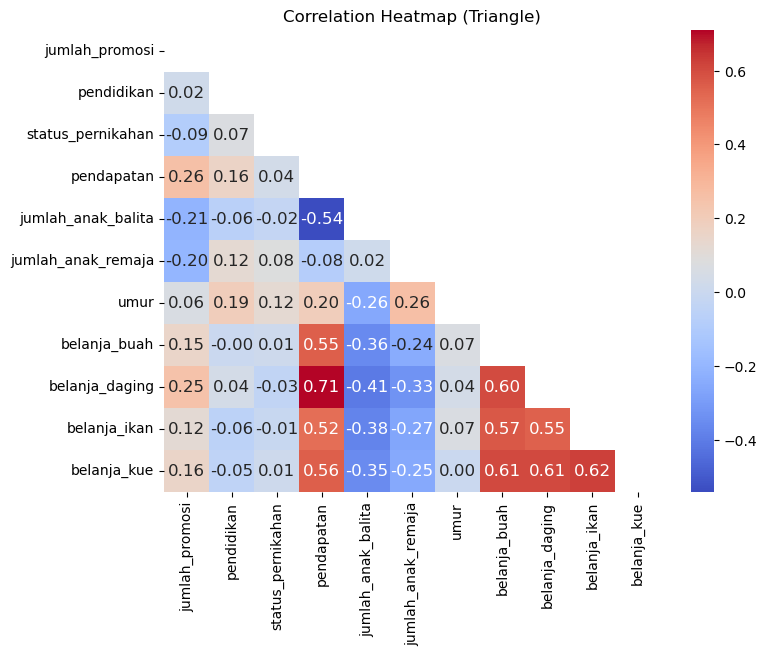

In [220]:
correlation_matrix = merged_df[['jumlah_promosi', 'pendidikan', 'status_pernikahan', 'pendapatan', 'jumlah_anak_balita', 'jumlah_anak_remaja', 'umur', 'belanja_buah', 'belanja_daging', 'belanja_ikan', 'belanja_kue']].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Heatmap (Triangle)')
plt.show()